In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = "unicode_escape")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.drop(["Status","unnamed1"], axis = 1 , inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df['Amount'] = df['Amount'].astype('int')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


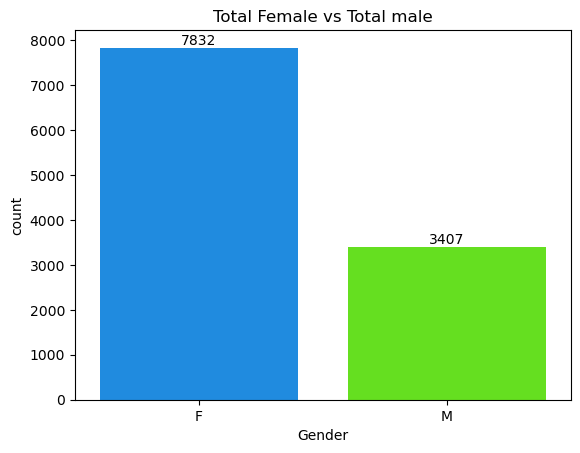

In [10]:
gencnt = sns.countplot(x='Gender',data = df,palette = "gist_rainbow_r" )
plt.title("Total Female vs Total male")


for bars in gencnt.containers:
    gencnt.bar_label(bars)

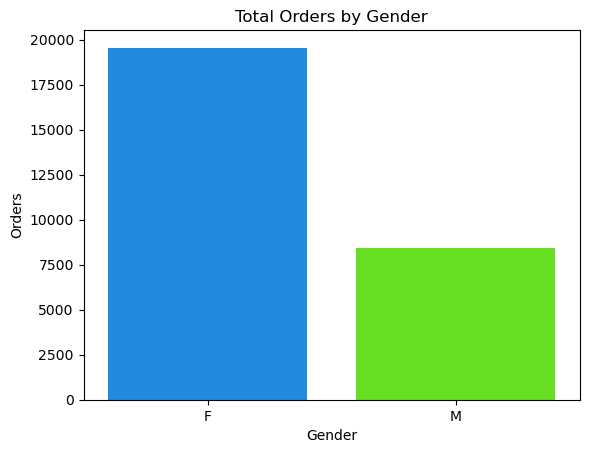

In [11]:
genodr = df.groupby(['Gender'],as_index=False)['Orders'].sum().sort_values(by = 'Orders',ascending = False)

sns.barplot(x='Gender',y='Orders',data=genodr,palette="gist_rainbow_r")
plt.title("Total Orders by Gender")


plt.show()

*From the above two graphs, we found that female customers and their orders are more than males.*

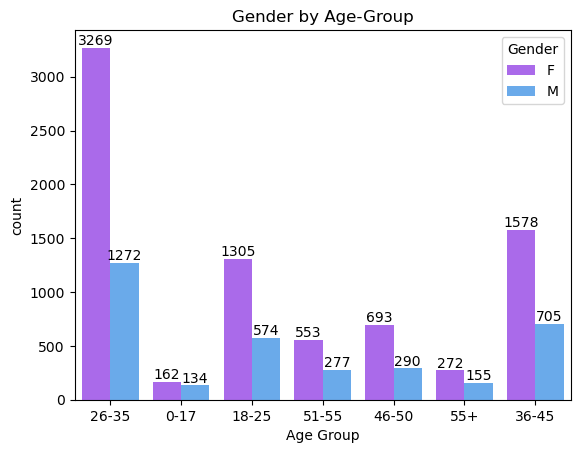

In [12]:
agen = sns.countplot(x='Age Group',data=df,hue='Gender',palette= "cool_r")
plt.title("Gender by Age-Group")
for bars in agen.containers:
    agen.bar_label(bars)
    
plt.show()   

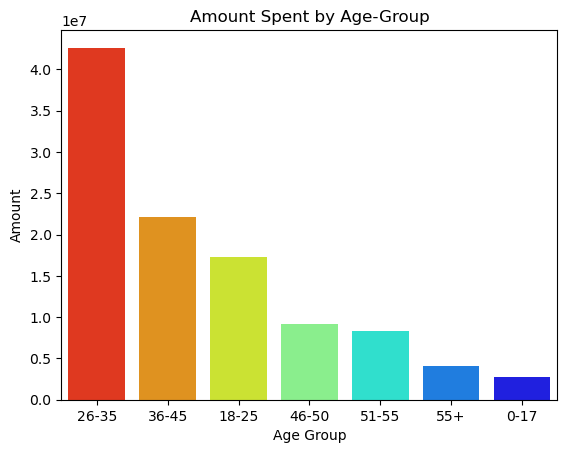

In [13]:
ageodr= df.groupby(["Age Group"],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.title("Amount Spent by Age-Group")
sns.barplot(x='Age Group',y='Amount',data=ageodr, palette = "jet_r")
plt.show()

*The above two graphs depict that 26-35 age-group customers spend more as compared to others.*

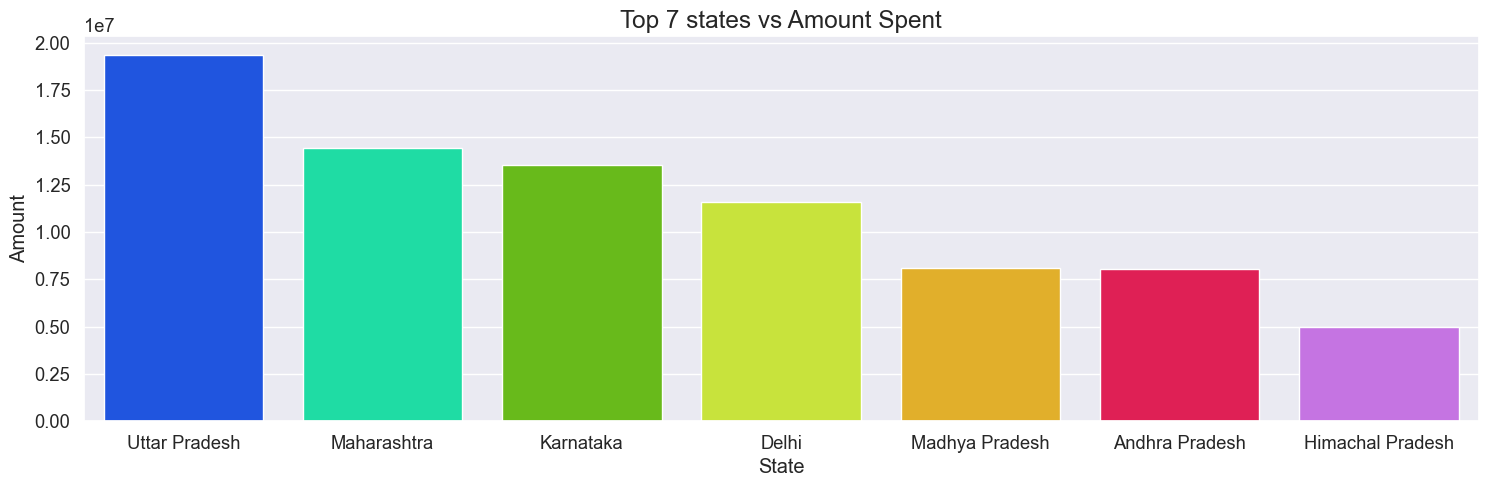

In [14]:
slsste=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(7)
sns.set(rc={'figure.figsize':(18,5)},font_scale=1.2)

sns.barplot(x='State',y='Amount',data=slsste, palette = "gist_ncar")
plt.title("Top 7 states vs Amount Spent",fontsize = '17.5')

plt.show()

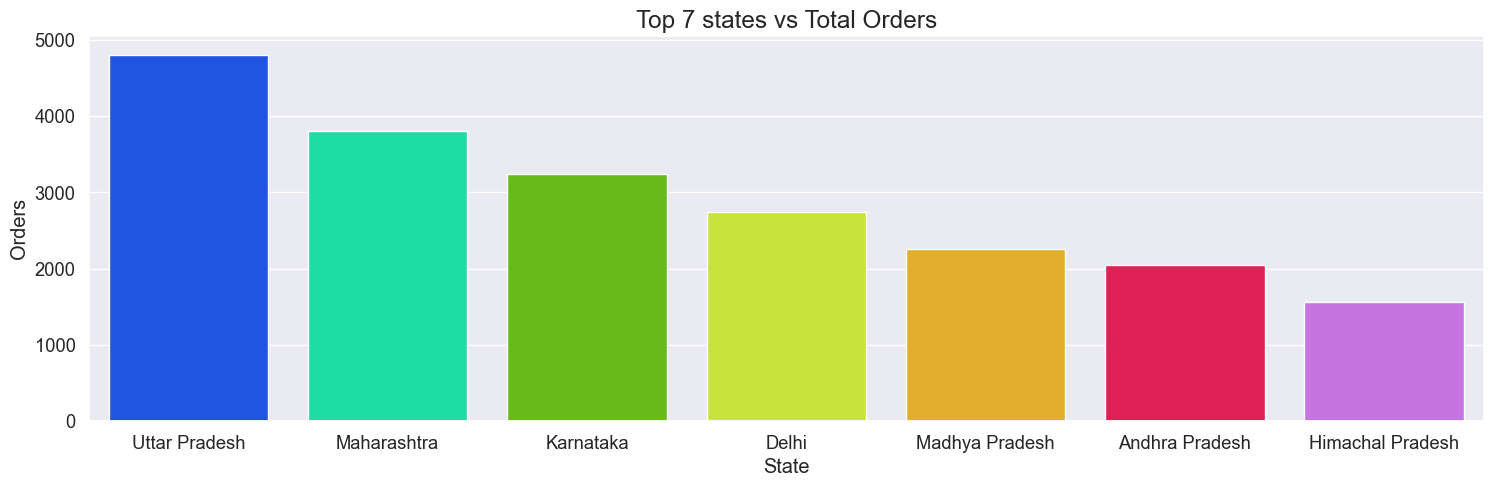

In [15]:
odrste=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(7)
sns.set(rc={'figure.figsize':(18,5)},font_scale=1.2)

sns.barplot(x='State',y='Orders',data=odrste, palette = "gist_ncar")
plt.title("Top 7 states vs Total Orders",fontsize = '17.5')

plt.show()

*The above two graphs depict that Uttar Pradesh,Maharashtra and Karnataka are contributing the most in terms of sales.*

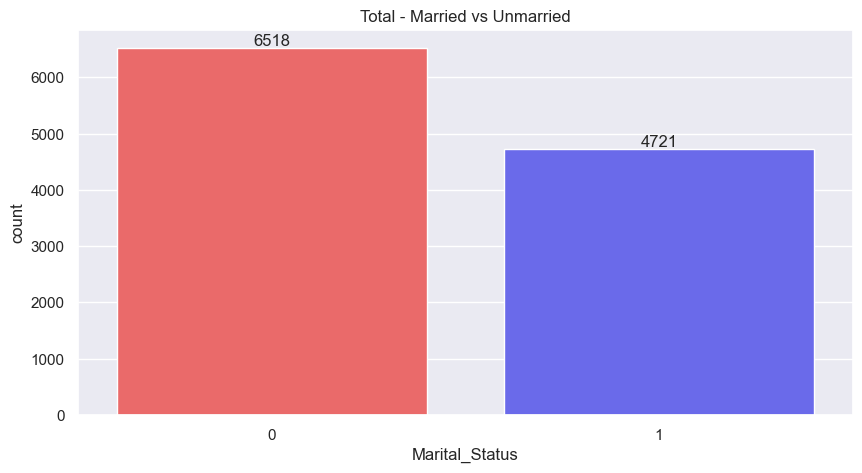

In [16]:
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Total - Married vs Unmarried")

marus= sns.countplot(data=df,x='Marital_Status', palette = "seismic_r")

for bars in marus.containers:
    marus.bar_label(bars)
plt.show()

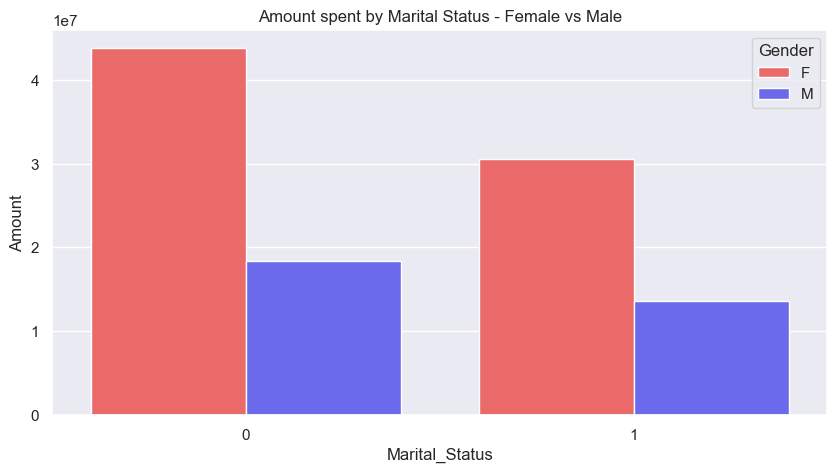

In [17]:
maramt=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(data = maramt,x='Marital_Status',y='Amount',hue='Gender',palette = "seismic_r")

plt.title("Amount spent by Marital Status - Female vs Male")
plt.show()

*The above two graphs show that married female purchasing power is more than the others.*

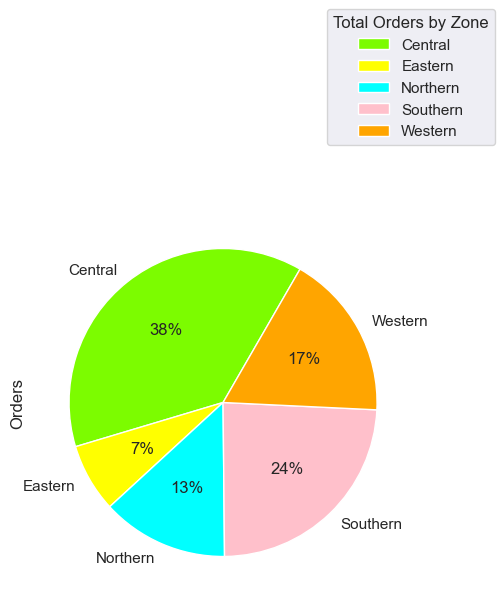

In [25]:
df.groupby(['Zone']).sum(numeric_only=True).plot(kind='pie',y='Orders', autopct='%1.0f%%',startangle=60,
colors=["lawngreen","yellow","cyan","pink","orange"])

plt.legend(title= "Total Orders by Zone",bbox_to_anchor =(0.75, 1.15))
sns.set(font_scale=1.0)

plt.show()        

*The above pie chart depicts that most of the orders are from the central zone.*

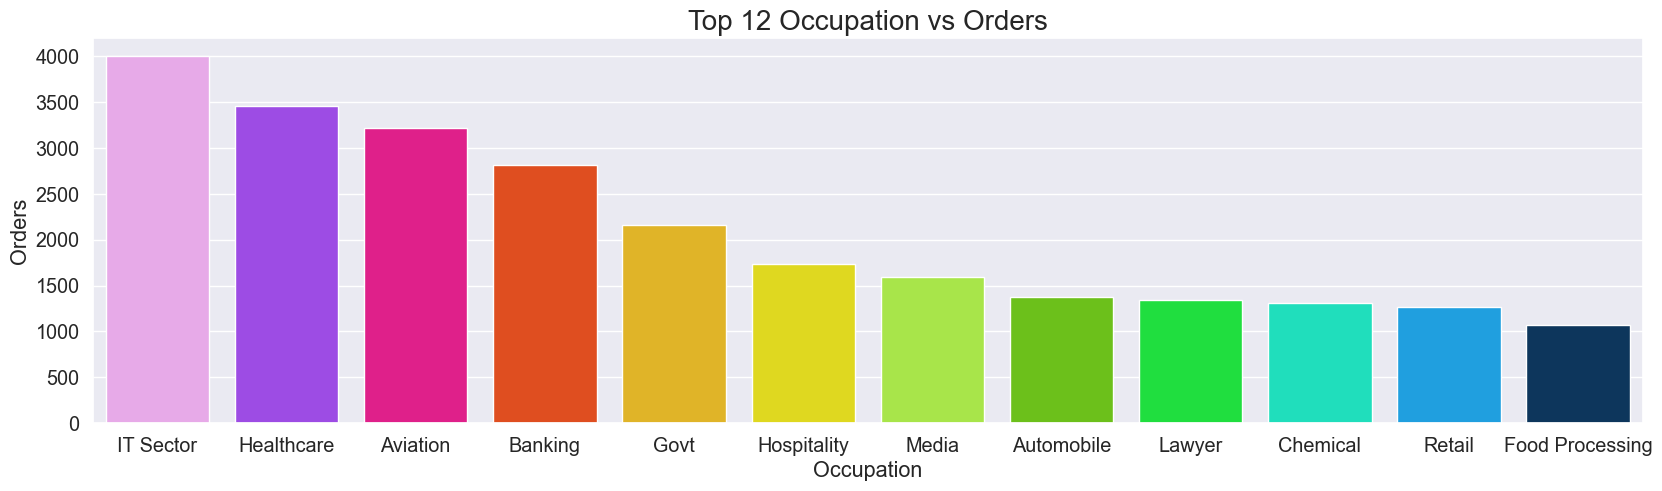

In [19]:
occodr=df.groupby(['Occupation'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(12)
sns.set(rc={'figure.figsize':(20,5)},font_scale=1.3)
plt.title("Top 12 Occupation vs Orders",fontsize='20')

sns.barplot(x='Occupation',y='Orders',data=occodr,palette = "gist_ncar_r")


plt.show()

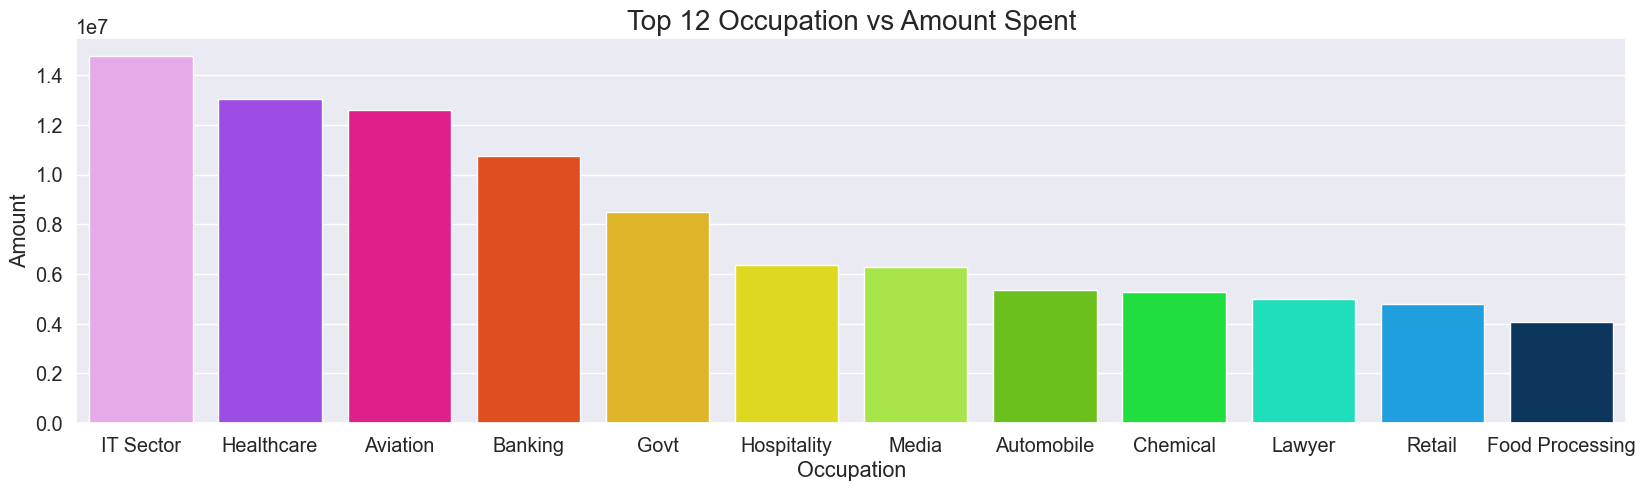

In [20]:
occamt=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(12)
sns.set(rc={'figure.figsize':(20,5)},font_scale=1.3)
plt.title("Top 12 Occupation vs Amount Spent",fontsize='20')

sns.barplot(x='Occupation',y='Amount',data=occamt, palette = "gist_ncar_r")

plt.show()

*The above two graphs depict that buyers from the IT sector, healthcare, and Aviation contribute the most in terms of orders as well as amounts.*

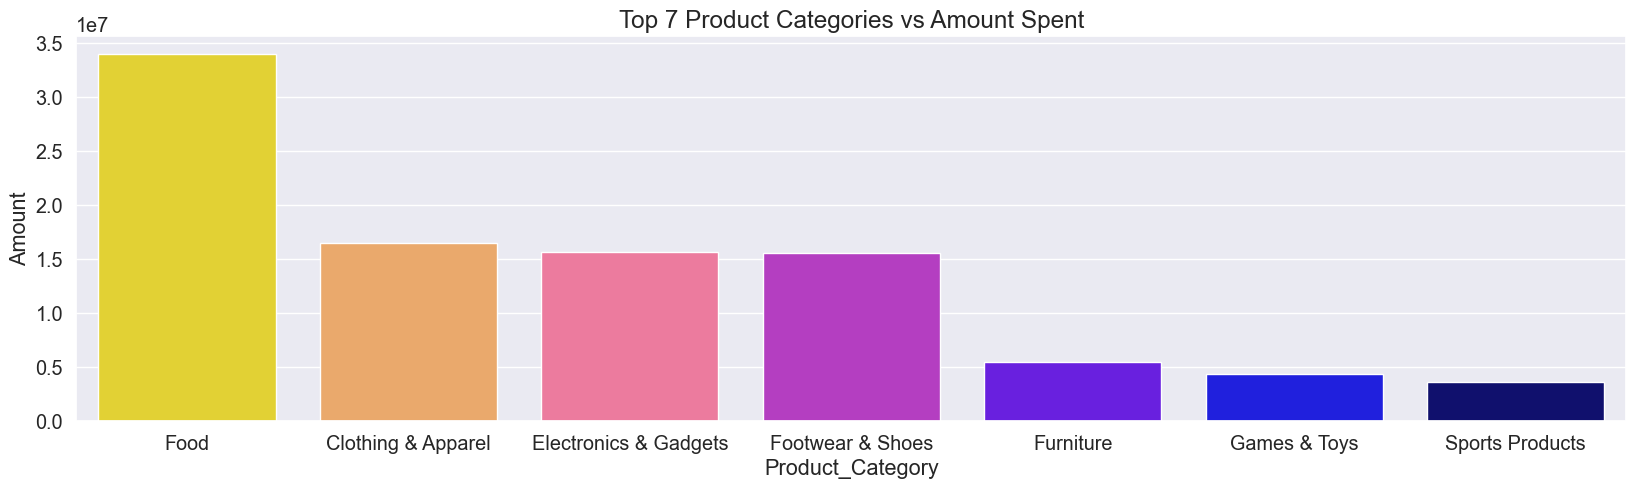

In [21]:
catamt=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(7)
sns.set(rc={'figure.figsize':(20,5)},font_scale=1.3)
plt.title("Top 7 Product Categories vs Amount Spent",fontsize='17.5')

sns.barplot(x='Product_Category',y='Amount',data=catamt, palette ="gnuplot2_r")



plt.show()

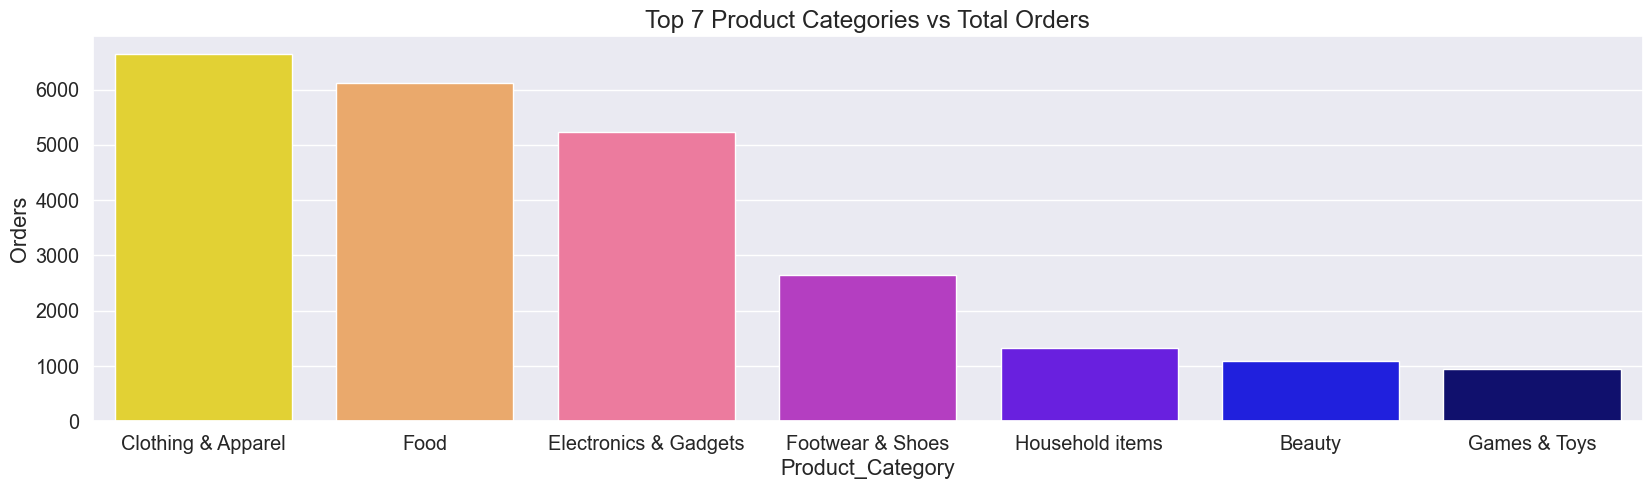

In [22]:
catodr=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(7)
sns.set(rc={'figure.figsize':(20,5)},font_scale=1.3)
plt.title("Top 7 Product Categories vs Total Orders",fontsize='17.5')

sns.barplot(x='Product_Category',y='Orders',data=catodr,palette ="gnuplot2_r")

plt.show()

*The above two graphs show that clothing and apparel, food, and electronics and gadgets are the top selling categories.*

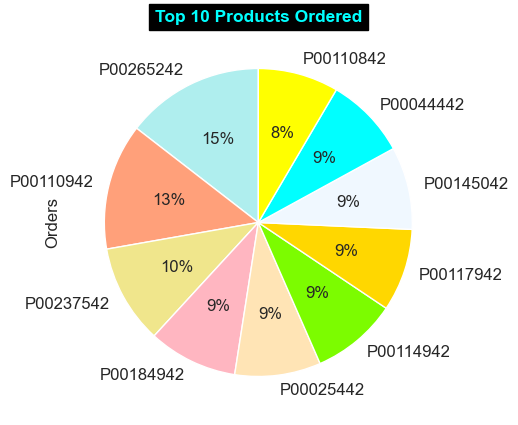

In [27]:
plt.title("Top 10 Products Ordered",fontsize='12.5',color = 'cyan',backgroundcolor='black',weight='bold')

pdctodr=df.groupby(['Product_ID'])['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='pie',
y='Orders',    startangle=90,  autopct='%1.0f%%',    fontsize='12',

colors=["paleturquoise","lightsalmon","khaki","lightpink","moccasin","lawngreen","gold","aliceblue","cyan","yellow"])


plt.show()


*The above pie chart depicts that P00110942 and P00265242 are the top-selling products.*

***Final Conclusion : Married women age 26–35 from UP (Central Zone), Maharastra (Western Zone), and Karnataka (Southern Zone) working in IT, healthcare, and Aviation are more likely to buy products from the Food, Clothing, and Electronics category.***